PILAR ARIAS, YEDRA MARTÍN, PATRICIA MEDIAVILLA, AMAYA SARASA

<GRUPO 9>

#INTRODUCCIÓN

Esta es la primera práctica del primer laboratorio. Dada una base de datos en formato .csv, se nos pide contestar a una serie de cuestiones. Para ello, lo primero que debemos hacer es cargar y leer la base de datos:

In [44]:
#importamos la base de datos
import pandas as pd #pandas
df_raw=pd.read_csv('airbnb.csv',encoding='latin-1')
df_raw.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Se observa que se ha cargado de manera correcta. 

Importamos así también todas las librerías necesarias para ejecutar esta práctica. 

In [45]:
#importamos todas las librerías necesarias: 
import sklearn #scikit-learn
import matplotlib.pyplot as plt #gráfica Matplotlib
import seaborn as sns
import numpy as np #NumPy

Según se ha estudiado en clase, encontramos dos métodos para afrontarlo. Nos decantaremos por CRISP-DM. Las siglas para: CRoss-Industry Standard Process for Data Mining. 

Es un modelo de proceso de minería de datos que se utiliza en la industria. Es un marco de trabajo que define un proceso estandarizado para llevar a cabo proyectos de minería de datos, desde la definición del problema hasta la implementación y evaluación del resultado. Los seis pasos que componen Crisp-DM son los siguientes:

- Comprensión de los negocios y definición del problema: comprender la naturaleza del problema y los objetivos de negocio.

- Comprensión de los datos: recopilación inicial, descripción y exploración  de datos.

- Preparación de los datos: Selección, limpieza, construcción, integración, formateo de los datos.

- Modelado: aplicar las técnicas de minería de datos a los dataset.

- Evaluación: determinar si los resultados son útiles a las necesidades del negocio.

- Despliegue: explotar utilidad de los modelos, integrándolos en las tareas de toma de decisiones de la organización -> Call to Action. 


#EJERCICIO 1

## Comprensión del negocio y definición del problema

El barrio de Williamsburg es uno de los barrios de moda hoy en día. Desde 2005 ha pasado de ser un distrito donde principalmente se encontraban fabricas a acoger una gran cantidad de gente joven y nuevos negocios. ¿Teniendo en cuenta los datos proporcionados que posición en términos de popularidad/calidad se puede decir que ostenta el barrio con respecto a los demás que forma New York?

Para medir la popularidad/calidad del barrio, tendremos primero en cuenta el número de apartamentos de calidad según los usuarios. Para ello, lo primero será clasificar los apartamentos como “Muy Malos”, “Malos”, “Regulares”, “Buenos” y “Muy Buenos”. Para ello primero haremos un par de transformaciones de los datos. La columna de reseñas por mes, se dividirán en 3 rangos iguales, después dependiendo del valor concreto que tenga cada apartamento se le asignarán las etiquetas: “Baja”, “Media” y ”Alta”. Para la columna que indica el número de días que está disponible asignaremos las etiquetas de menor valor a mayor de la siguiente manera: “Poco disponible”, “Disponible normalmente” y “Altamente disponible”. Finalmente crearemos una columna para clasificar los apartamentos, teniendo en cuenta una serie de reglas, que se explicarán más adelante. 

## Comprensión de los datos

La base de datos que utilizaremos consta de 48895 observaciones. En cada observación recopilamos los siguientes atributos: 
- id: id del apartamento en cuestión. 
- name: nombre del apartamento
- host_id: id del anfitrión 
- host_name: nombre del anfitrión 
- neighbourhood_group: estado al que pertenece
- neighbourhood: barrio al que pertenece 
- latitude: coordenadas de latitud
- longitude: coordenadas de longitud 
- room_type: tipo de habitación 
- price: precio en dólares
- minimum_nights: noches mínimas que te puedes hospedar
- number_of_reviews: número de reseñas 
- last_review: última reseña 
- reviews_per_month: reseñas por mes
- calculated_host_listings_count: cantidad de propiedades que un anfitrión tiene disponibles en la plataforma
- availability_365: días disponibles por año. 


Se ha investigado esta base de datos en kaggle para entender mejor cada variable, pero no lo explican con claridad, y cabe rebundancia, por lo que se explicará la interpretación que se le ha dado a cada una. 

availability_365: suponemos que la propiedad está dispuesta en la plataforma los 365 días del año, es decir, cualquier mes está disponible. Obviamos que sea una casa de verano que sólo se alquile los meses de junio y julio por ejemplo, para definirlo bien, se podrá alquilar los 12 meses del año. 

## Preparación de los datos

Primero debemos tratar la base de datos para así estudiar qué hacer con los datos NaN que encontraremos. 

Analizamos cuántos datos NaN hay en la columna 'reviews_per_month', ya que la trataremos posteriormente, y deberemos conocer el contenido de esta. 


In [46]:
reviews_per_month_nan = df['reviews_per_month'].isna().sum()
print(reviews_per_month_nan)

0


Ahora bien, vemos que hay 10052 datos NaN en la columna. Observemos cuántos datos hay en total para barajar las distintas opciones de qué hacer con estos datos NaN. Si es poca cantidad comparado con la cantidad de observaciones en total, podremos eliminar directamente esas observaciones, sin embargo, si suponen gran cantidad, podríamos buscar otras opciones, como rellenar con la media para así no afectar al equilibrio del resto de datos. 

Es verdad que como hablamos de reseñas por mes, sería factible convertir esos NaN en 0, para que así a la hora de categorizar la columna, lo detecte como Bajo. 

¿Por qué rellenamos con 0's? Encontramos un NaN en la columna de 'reviews_per_month', cuando en la columna de 'number_of_reviews' aparece un 0, o un NaN directamente, es decir, que anteriormente no se ha hecho ninguna reseña, por lo que obviamente, en el último mes, tampoco. No deberíamos rellenar con la media, ya que ahí estamos aportando una cierta cantidad de reseñas que no se han hecho. 

In [47]:
num_observations = df.shape[0]
print(num_observations)

48895


Supone un 20% de los datos totales. No resulta útil borrarlos, si no que deberíamos rellenar con 0 como hemos explicado anteriormente. 

In [48]:
df['reviews_per_month'].fillna(0, inplace=True)

Comprobamos por tanto que en esa columna ya no nos quede ningún NaN

In [49]:
reviews_per_month_nan = df['reviews_per_month'].isna().sum()
print(reviews_per_month_nan)

0


Ahora debemos estudiar la distribución de esta, para ello haremos uso de boxplot, representando así cada apartamento para ver si hay outliers o datos rebundantes. 

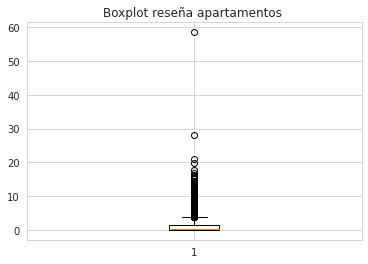

In [50]:
import matplotlib.pyplot as plt
boxplot_reviews=df['reviews_per_month']
plt.boxplot(boxplot_reviews)
plt.title('Boxplot reseña apartamentos ')
plt.show()

In [51]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_reviews)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))
            

-2.27 3.89 3312


Con esta información interpretamos que tenemos 3312 outliers, y que de valor máximo aceptado, se obtendrá 3,89, y mínimo lo interpretamos como 0, ya que no vamos a encontrar valores negativos en el número de reseñas por mes. 


Ya nos hemos asegurado que no nos quedad ningún dato NaN, así no encontraremos ningún error a la hora de categorizar la columna, que es el siguiente paso. 

Lo categorizamos en tres: Baja, Media y Alta. 

Considerando que según los rangos intercuartiles hemos obtenido que el máximo valor que se considera aceptable es 3,89, y que el outlier mayor que se puede conseguir es 60, no podemos hacer los rangos teniendo en cuenta el mayor que se pueda tomar, si no el mayor aceptado. Es por ello que para definir cada uno,tendremos en cuenta el rango intercuartilíco: [0-3.89] 

Por lo que: 
- [0-1.3) = 'Baja'
- [1.3 - 2.6) = 'Media'
- [2.6 - 60) = 'Alta' (si no encontrásemos outliers, terminaría en 3.89, pero lo que vamos a hacer es simplemente ignorar esos outliers)

Por otro lado, vamos a clasificar los alquileres en función de los días que están disponibles. 

Para ello, siguiendo el patrón anterior, calculamos si hay NaN en la columna correspondiente: 


In [52]:
disponibilidad_nan = df['availability_365'].isna().sum()
print(disponibilidad_nan)

0


No hay ningún NaN en dicha columna, por lo que no hace falta tratarlos. En el caso de encontrarlos, se tendría que estudiar qué hacer con este conjunto de datos de manera independiente. 



Ahora pasamos a estudiar de la misma manera la distribución de esta variable, gracias al uso de Boxplot.

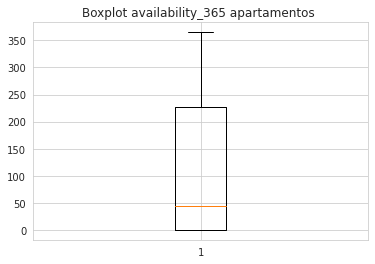

In [53]:
import matplotlib.pyplot as plt
boxplot_availability_365=df['availability_365']
plt.boxplot(boxplot_availability_365)
plt.title('Boxplot availability_365 apartamentos ')
plt.show()

In [54]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_availability_365)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-340.5 567.5 0


Según este modelo, no encontramos ningún outliers, por lo que podemos continuar. 

Es importante mencionar el valor máximo aceptado obtenido, y es que es 567.5, cuando en un año contamos con 365 días (en el caso de que no sea bisiesto). 
Es por ello que nos faltaría información para interpretar este máximo, ya que lo podríamos contar con que hay una serie de apartamentos se pueden alquilar durante 4 horas, por lo que un apartamento puede tener varias reseñas al día, o que durante una estancia, todos los usuarios que se hayan quedado puedan poner una reseña. 

Por lo que una vez hemos estudiado cada variable y sus outliers, podemos proceder con el ejercicio. 
Tal y como nos dice, para medir la popularidad/calidad del barrio, necesitaremos hacer uso de una clasificación, que tomará como factores a estudiar la cantidad de reseñas al mes ('reviews_per_month') y la disponibilidad de este ('availabilty_365'). 
Pero debemos definir estas variables en rangos, tal y como se ha explicado anteriormente. 



 Poco disponible | Disponible normalmente | Altamente disponible
-----:|:--------:| -------
Bueno | Regular | Malo
Bueno | Regular | Malo
Muy bueno | Bueno | Muy Malo




Donde cada fila depende del valor de la reseña en Baja, Media y Alta respectivamente.

La siguiente celda es una función para la nueva variable 'classification'.

In [55]:
def etiqueta_calidad(row):  
    if row[1]=='Poco disponible' and row[0]=='Baja': 
        return 'Bueno'
    if row[1]=='Poco disponible' and row[0]=='Media':
        return 'Bueno'
    if row[1]=='Poco disponible' and row[0]=='Alta':
        return 'Muy bueno'
    if row[1]=='Disponible normalmente' and row[0]=='Baja':
        return 'Regular'
    if row[1]=='Disponible normalmente' and row[0]=='Media':
        return 'Regular'
    if row[1]=='Disponible normalmente' and row[0]=='Alta':
        return 'Bueno'
    if row[1]=='Altamente disponible' and row[0]=='Baja':
        return 'Malo'
    if row[1]=='Altamente disponible' and row[0]=='Media':
        return 'Malo'
    if row[1]=='Altamente disponible' and row[0]=='Alta':
        return 'Muy malo'
    return 'N/A'

Otra función que rellena los N/A de la columna de 'reviews_per_month' con 0, por las razones que se han expuesto. 

In [56]:
def fillna_0 (df_):
    return df_.assign(reviews_per_month = df_['reviews_per_month'].fillna(0)) 

Como el objetivo del ejercicio es obtener la popularidad/calidad de cada barrio, para así ordenarlos y averiguar en qué ranking se encuentra el barrio 'Williamsburg', debemos hacer la media de cada uno, ya que no lo podremos estudiar con una clasificación categórica, no sería efectivo.

Volveremos a clasificarlos en una nueva variable llamada 'classification_num', que se regirá a partir de las nuevas reglas proporcionadas, pero con un ligero cambio, y es que cada rango va a pasar a obtener un valor, tal que así: 
- muy malo: 0
- malo: 0.25
- regular: 0.5 
- bueno: 0.75 
- muy bueno: 1 

De esta manera, obtendremos datos numéricos para hacer la media exacta, y que así podamos obtener la posición exacta. Al hacer la media, conseguiremos valores entre [0,1] por cada barrio.

In [57]:
df = (df_raw
 .pipe(fillna_0) #llamamos a la función para rellenar con 0
 .assign(availability_365_range= 
        lambda df_: pd.cut(df_['availability_365'],bins=3,labels=['Poco disponible','Disponible normalmente','Altamente disponible'])) 
        #dividimos la variable 'availability_365' en 3 rangos iguales, tal y como se ha explicado anteriormente. 
 .assign(reviews_per_month_cat = 
        lambda df_: pd.cut(df_['reviews_per_month'],bins=[-0.1,1.3,2.6,60],labels=['Baja','Media','Alta']))
        #dividimos la variable 'reviews_per_month' en 3 rangos, tal y como se ha justificado.
 .assign(classification = 
         lambda df_: df_[['reviews_per_month_cat','availability_365_range']].apply(lambda x: etiqueta_calidad(x),axis=1))
        #llamamos a la función 'etiqueta_calidad' para la nueva variable de clasificación
 .assign(classification_num = 
         lambda df_: df_['classification'].map(lambda x: 1 if x=='Muy bueno' else 0 if x=='Muy malo' else 0.25 if x=='Malo' else 0.5 if x=='Regular' else 0.75))
        #clasificamos numéricamente los rangos, según la variable de 'classification', tal y como se ha explicado
)

Comprobamos lsi todo se ha ejecutado correctamente, para ello contaremos los posibles 'N/A' en la variable de 'classification'

In [58]:

classif_nan = df['classification'].isna().sum()
print(classif_nan)

0


Hacemos la misma comprobación en la variable de 'reviews_per_month_cat'

In [59]:
df.query('reviews_per_month_cat=="N/A"')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,availability_365_range,reviews_per_month_cat,classification,classification_num


Obtenemos el valor deseado. Ahora, gracias a la función '.value_counts', compararemos las dos columnas 'classification' y 'classification_num', ya que deberán tener el mismo número de apartamentos en cada rango o valor corresponidentemente. 

In [60]:
df['classification'].value_counts()

Bueno        29036
Malo          9474
Regular       4971
Muy bueno     3413
Muy malo      2001
Name: classification, dtype: int64

In [61]:
df['classification_num'].value_counts()

0.75    29036
0.25     9474
0.50     4971
1.00     3413
0.00     2001
Name: classification_num, dtype: int64

Todo se ha ejectuado correctamente, podemos continuar con el ejercicio. 

## Modelado


Una vez hemos preparado los datos tal y como deseamos, procedemos a modelar y estudiar el objetivo. Vamos a ver cuántos barrios hay, y cuántos apartamentos encontramos en los más populares. 

In [62]:
#ESTO LO QUITAMOS
df['neighbourhood'].value_counts()


Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Primero observamos que Williamsburg es donde más apartamentos encontramos.


Debemos comprobar que cada apartamento tiene un barrio asociado, así podemos descartar futuros problemas. 

In [63]:
neighbourhood_nan = df['neighbourhood'].isna().sum()
print(neighbourhood_nan)

0


Debemos ordenar los barrios según la popularidad/calidad. Para ello, según las indicaciones que nos dan, tendremos primero en cuenta el número de apartamentos de calidad según los usuarios. Definimos un apartamento de calidad, aquellos cuya clasificación sea considerada como Buena o Muy buena, esto se traduce a que la variable 'classification' deberá tener el valor "Bueno" o "Muy bueno". 
A partir de ahí, tendremos en cuenta la cantidad de apartamentos que tenga el barrio. Será un barrio más popular aquel que cuente con mayor cantidad de apartamentos. Para ello ordenaremos según los 'id', ya que cada apartamento tiene un id, y así podremos contarlos.  

La ordenación y agrupación de estos criterios, tendrá lugar en la variable x_barrios. 

Una vez tengamos esta variable, simplemente tendremos que buscar en qué lugar se ostenta el barrio 'Williamsburg' con respecto a los demás que forma New York, satisfaciendo así nuestro objetivo.

In [64]:
x_barrios = list(df
 .groupby(['neighbourhood','classification']).id
 .count()
 .reset_index()
 .query('classification in ["Bueno","Muy bueno"]')
 .groupby('neighbourhood')
 .sum()
 .sort_values(by='id',ascending=False)  
 .index[:5] 
)

Hemos tomado los 5 primeros para poder observar si se ha ejecutado correctamente. 

In [65]:
x_barrios

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'East Village']

Ya hemos alcanzado el objetivo que buscábamos, el barrio 'Williamsburg' ostenta la posición primera en términos de popularidad/calidad. 

##Evaluación


Para determinar si los resultados son útiles a las necesidades del negocio, debemos tener en cuenta con qué tipo de empresa se está trabajando. 

##Despliegue

In [66]:
df['neighbourhood'].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Para explotar la utilidad de este modelo (Call to Action), debemos estudiar el resultado obtenido. 
¿Para qué puede servir esto? Si un particular busca aumentar el beneficio de alquilar su propiedad, podrá tener en cuenta este estudio, para según en qué barrio se localiza, estudiar el precio de su apartamento. 

Pongamos un par de ejemplos: 

Si el apartamento se localiza en el barrio de 'Williamsburg' deberá adecuar el precio, según el resto de apartamentos, teniendo en cuenta que de media, los apartamentos en esa zona, tienen buena calificación, y que disponen de gran cantidad, por lo que si eleva mucho el precio, nadie estará dispuesto a pagarlo, teniendo otras opciones.  

Sin embargo si el apartamento se encuentra en el barrio 'Rossville' podrá aumentar el precio por noche, ya que como se observa, es el único apartamento que se encuentra en ese barrio, no tendrá competencia. Si alguien se necesita hospedar ahí, sólo tendrá esa opción. 


#EJERCICIO 2

 Explica visualmente como se distribuyen los 5 barrios más populares (esto serán aquellos cuyos apartamentos estén más solicitados en números absolutos. Para ello utiliza un diagrama de burbuja donde el eje de las X indica el barrio y el eje Y la calidad de los apartamentos. Usa todos los diagramas que necesites para llegar a esta conclusión final.

La selección de los 5 barrios más populares ya se realizó en el ejercicio anterior, y se definió en la variable de x_barrios, por lo que lo próximo será representarlos para estudiar las distribuciones de estos. 

##Bubble sort

- x_barrios: los 5 barrios más populares en términos de disponibilidad
- y_barrios: la calidad de los apartamentos de cada barrio correspondiente. 
- s_barrios: disponibilidad de los apartamentos de cada barrio correspondiente. 

Contar problema que hemos tenido con la disponibilidad-> cuanta menos disponibilidad-> mejor -> menos disponibilidad implica 0 días disponibles al año -> toma los 5 mejores (encontramos 0) -> size será 0. 

In [67]:
df_draw = (df 
           .query('neighbourhood in @x_barrios')
           .groupby(['neighbourhood','classification']).id
           .count()
           .reset_index()
          )

In [68]:
df_draw

,neighbourhood,classification,id
0,Bedford-Stuyvesant,Bueno,2144
1,Bedford-Stuyvesant,Malo,685
2,Bedford-Stuyvesant,Muy bueno,313
3,Bedford-Stuyvesant,Muy malo,208
4,Bedford-Stuyvesant,Regular,364
5,Bushwick,Bueno,1611
6,Bushwick,Malo,377
7,Bushwick,Muy bueno,185
8,Bushwick,Muy malo,91
9,Bushwick,Regular,201


Text(0.5, 0.92, 'Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por categoría')

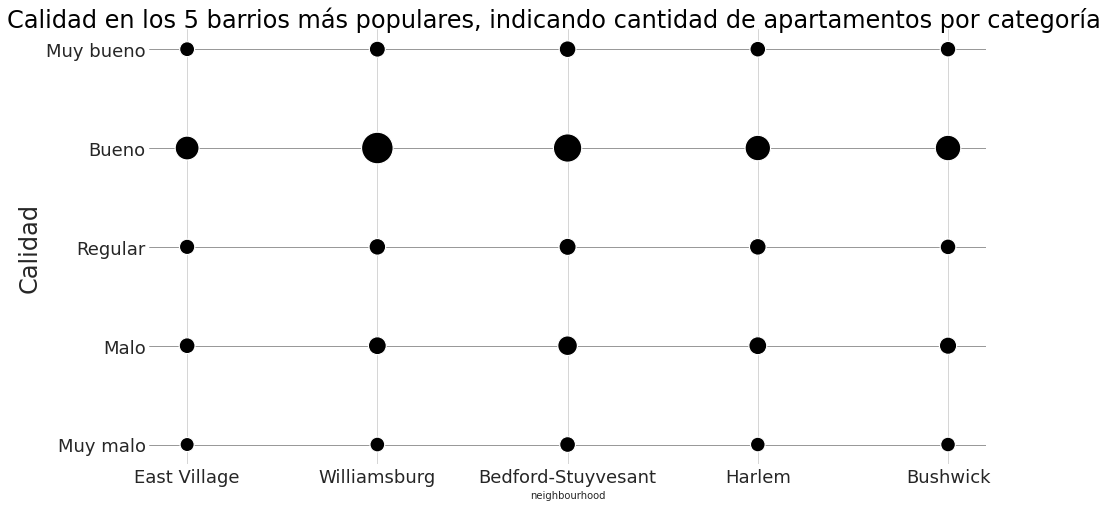

In [71]:
titulo = f"Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por categoría"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')

ordenacion_calidad = {'Muy malo':5, 'Malo':4, 'Regular':3, 'Bueno':2, 'Muy bueno':1}

sns.scatterplot(data=df_draw.sort_values(by=['classification'], key=lambda x:x.map(ordenacion_calidad)),
               x='neighbourhood',
               y='classification',
               size='id',
               sizes=(200,1000),
               color='black'
               )

ax.legend().set_visible(False)
#ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{x:,.2f}'))

#for t in legend.texts:
#    t.set_text(t.get_text()[:3])
#ax.legend(title='apartamentos po',fontsize=24, title_fontsize=24)

sns.despine(left=True, bottom=True)
#ax.set_xlabel('Barrio',fontsize=24,weight='regular')
ax.set_ylabel('Calidad',fontsize=24,weight='regular')

#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

In [72]:
df_draw = (df
           .query("neighbourhood in @x_barrios")
           
           .groupby('neighbourhood')['classification_num'].aggregate(['mean','count'])
           #.mean()
           .reset_index()
            )

In [73]:
df_draw

,neighbourhood,mean,count
0,Bedford-Stuyvesant,0.612345,3714
1,Bushwick,0.644219,2465
2,East Village,0.672288,1853
3,Harlem,0.628574,2658
4,Williamsburg,0.667921,3920


Text(0.5, 0.92, 'Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por barrio, y clasificación numérica')

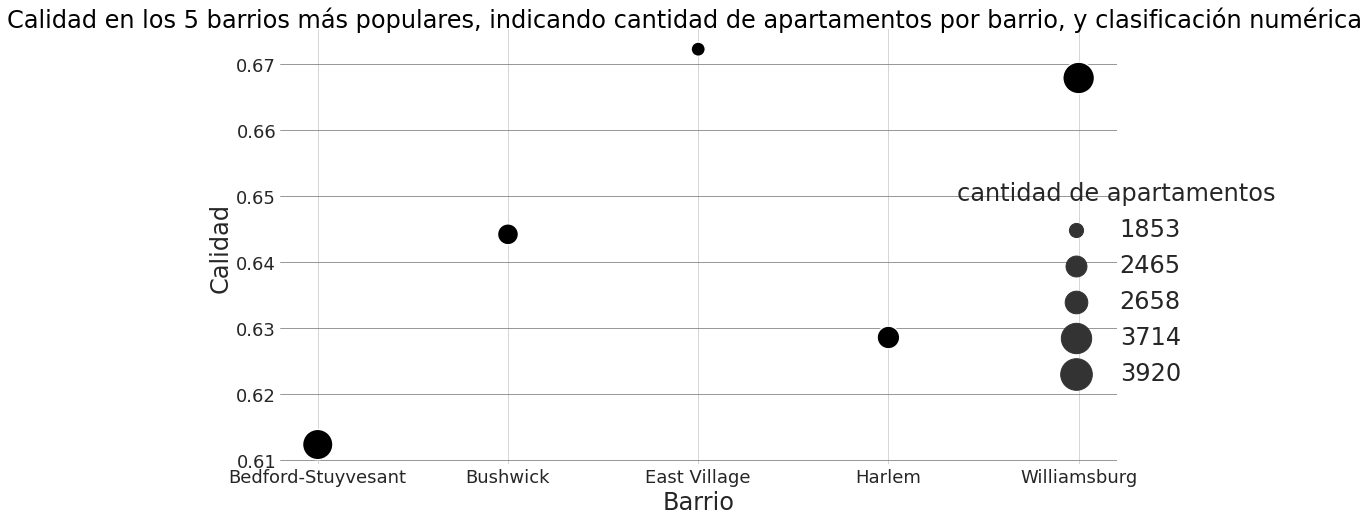

In [74]:
titulo = f"Calidad en los 5 barrios más populares, indicando cantidad de apartamentos por barrio, y clasificación numérica"
color = sns.color_palette('Set2',8)

f, ax = plt.subplots(1,figsize=(15,8))
sns.set_style(style='whitegrid')


sns.scatterplot(data=df_draw,
               x='neighbourhood',
               y='mean',
               size='count',
               sizes=(200,1000),
               color='black'
               )

ax.legend(fontsize=24)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda v,x:f'{v:,.2f}'))
legend = ax.legend()
for t in legend.texts:
    t.set_text(t.get_text()[:3])
ax.legend(title='cantidad de apartamentos',fontsize=24, title_fontsize=24, loc=9, bbox_to_anchor=(1,.7), frameon=False)

sns.despine(left=True, bottom=True)
ax.set_xlabel('Barrio',fontsize=24,weight='regular')
ax.set_ylabel('Calidad',fontsize=24,weight='regular')

#ax.set_axisbelow(False)
ax.grid(axis='y',color='gray')
ax.xaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)
ax.yaxis.set_tick_params(labelsize=18,width=0,rotation=0,pad=0)

f.suptitle(f'{titulo}',fontsize=24,color='black',x=.5,ha='center',y=.92)

In [75]:
x_barrios

['Williamsburg', 'Bedford-Stuyvesant', 'Harlem', 'Bushwick', 'East Village']

En esta gráfica podemos observar el sentido que ha tomado la clasificación de los 5 barrios seleccionados midiendo la popularidad/calidad, ya que: 
- Selección: todos los barrios tienen de media una clasificaión buena. 
- Ordenación: recordando el orden de los barrios 'Williamsburg' es el primero en la clasificación, y como se puede observar, es el que con más cantidad de apartamentos cuenta, seguido por 'Bedford-Stuyvesant'. 

#EJERCICIO 3

Una vez obtenida la información del apartado anterior, queremos tratar de entender las diferencias de precio entre alquilar un apartamento entero y una habitación privada. Usa los diagramas de cajas donde cada uno de los 5 barrios más populares está representado por una caja y haz una interpretación de los resultados.

##Estudio de datos

vamos a ver cuántos tipos de habitación hay: 

In [ ]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Estudiemos la cantidad de NaN que encontramos en esta variable: 

In [ ]:
room_type_nan = df['room_type'].isna().sum()
print(room_type_nan)

0


Para trabajar más fácil, asociaremos cada categoría a un valor numércio.

In [ ]:
df.loc[:,'room_type_num']=np.nan
filas = len(df.axes[0])
for i in range(filas): 
  if df['room_type'][i]=='Entire home/apt':
    df['room_type_num'][i]=0 
  elif df['room_type'][i]=='Private room':
    df['room_type_num'][i]=1 
  else: 
    df['room_type_num'][i]=0.5



<ipython-input-69-586775fef070>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_num'][i]=1
<ipython-input-69-586775fef070>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_num'][i]=0
<ipython-input-69-586775fef070>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['room_type_num'][i]=0.5


Ahora estudiemos la distribución de esta: 

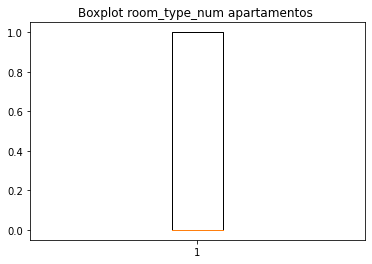

In [ ]:
import matplotlib.pyplot as plt
boxplot_room_type_num=df['room_type_num']
plt.boxplot(boxplot_room_type_num)
plt.title('Boxplot room_type_num apartamentos ')
plt.show()

In [ ]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_room_type_num)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-1.5 2.5 0


Vemos por tanto gracias a 'Boxplot' que no encontramos ningún outlier. 

In [ ]:
price_nan= df['price'].isna().sum()
price_nan

0

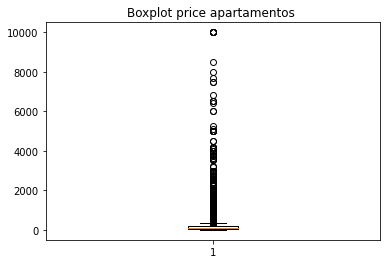

In [ ]:
import matplotlib.pyplot as plt
boxplot_price=df['price']
plt.boxplot(boxplot_price)
plt.title('Boxplot price apartamentos ')
plt.show()

In [ ]:
from matplotlib.cbook import boxplot_stats 
stats = boxplot_stats(boxplot_room_type_num)
stats = stats[0] 
outliers = stats['fliers']
min = stats['q1']-1.5*stats['iqr']
max = stats['q3']+1.5*stats['iqr']
print(min, max, len(outliers))

-1.5 2.5 0


COMENTAR ESTO

##Representación

En el ejercicio anterior, ya creamos una variable llamada x_barrios, en la que guardamos los barrios más populares según el criterio de las reseñas. Reutilizaremos ese criterio en este ejericico. 

Por cada barrios, representaremos una caja, en el que sólo mostraremos aquellos apartamentos cuyo alquiler sea de tipo apartamento entero, 

In [ ]:
# boxplot: (x=barrio; y=precio; hue=1 y 0)
df.loc[df['room_type']!='Shared room',:]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month_cat,availability_365_range,classification,classification_num,room_type_num
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,...,9,2018-10-19,0.21,6,365,Baja,Altamente disponible,Malo,0.25,1.0
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,...,45,2019-05-21,0.38,2,355,Baja,Altamente disponible,Malo,0.25,0.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,...,0,NaN,0.00,1,365,Baja,Altamente disponible,Malo,0.25,1.0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,...,270,2019-07-05,4.64,1,194,Alta,Disponible normalmente,Bueno,0.75,0.0
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,...,9,2018-11-19,0.10,1,0,Baja,Poco disponible,Bueno,0.75,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48889,36484363,QUIT PRIVATE HOUSE,107716952,Michael,Queens,Jamaica,40.69137,-73.80844,Private room,65,...,0,NaN,0.00,2,163,Baja,Disponible normalmente,Regular,0.50,1.0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,...,0,NaN,0.00,2,9,Baja,Poco disponible,Bueno,0.75,1.0
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,...,0,NaN,0.00,2,36,Baja,Poco disponible,Bueno,0.75,1.0
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,...,0,NaN,0.00,1,27,Baja,Poco disponible,Bueno,0.75,0.0


#EJERCICIO 4

Por último, se intuye que la tendencia a dejar reseñas en las apps que prestan servicios, ha aumentado en los últimos años. Decide que diagrama es más útil para este caso. Dibújalo y realiza una interpretación del mismo. Tomaremos la fecha de la última reseña como el dato útil para realizar dicho caso.

In [ ]:
#antes de ordenar los datos, veamos cuantos NaN's tenemos en la columna de años
date_nan = df['last_review'].isna().sum()
print(date_nan)

In [ ]:
num_observations = df.shape[0]
print(date_nan/num_observations)

Supone un 20% del total de los datos.

Como el valor es demasiado alto para eliminar los datos, vamos a interpretar que son esos NaN's para poder saber que hacer con esos datos. En la columna de 'last review', interpretamos que si aparencen es porque no ha habido última reseña, por lo que no aportan información a lo que buscamos. Eliminamos entonces esos datos.

In [ ]:
from datetime import datetime
#borramos los NaN
df2=df.dropna()
df2.loc[:,'date']=np.nan

#pasamos a formato fecha los datos
df2['date']= pd.to_datetime(df2['last_review'])
df2['date'] = df2['date'].dt.year 
#unicamente nos interesa el año, asi que guardamos el año en la última columna
df2['date'].head

In [ ]:
#agrupamos según año y sumamos el número de reseñas en cada año. 
#creamos una nueva columna donde sumamos el numero de reseñas según el año:

year= np.unique(df2['date'])
num_anos = len(year)
print('Número de años:', num_anos)

Podemos, entonces definir que las reseñas se reparten en 9 años.

In [ ]:
resenas=df2.groupby("date").reviews_per_month.sum()
print(resenas)

In [ ]:
df_=df.assign(last_review= lambda df_:pd.to_datetime(df_['last_review']))

In [ ]:
df_.iloc[0]['last_review'].year 

In [ ]:
df_.groupby(pd.Grouper(key='last_review',freq='Y')).count().id

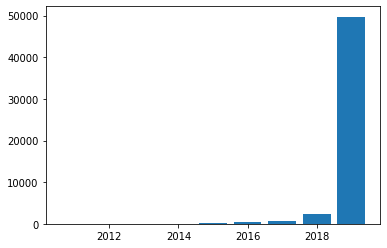

In [ ]:
import matplotlib.pyplot as plot
fig, ax = plot.subplots()
ax.bar(resenas.index, resenas.values)
plot.show()

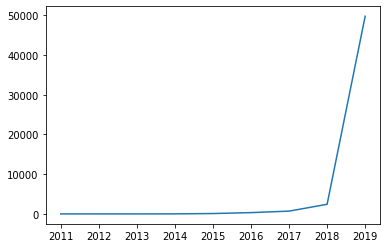

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(resenas.index, resenas.values)
plt.show()

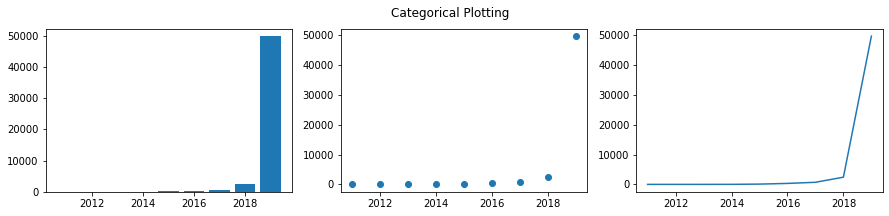

In [ ]:
plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.bar(resenas.index, resenas.values)
plt.subplot(132)
plt.scatter(resenas.index, resenas.values)
plt.subplot(133)
plt.plot(resenas.index, resenas.values)
plt.suptitle('Categorical Plotting')
plt.show()